![](Pics/pandas001.svg)

# Pandas

[Pandas 官网](https://pandas.pydata.org/)

[Pandas Docs](https://pandas.pydata.org/docs/)


In [1]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 10 minutes to pandas

[10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#minutes-to-pandas)

basic data structures
1. **Series** - a **one-dimensional** labeled array holding data of any type
2. **DataFrame** - a **two-dimensional** data structure that holds data like a two-dimension array or a table with rows and columns


In [2]:
import numpy as np
import pandas as pd

print("np.__version__ =", np.__version__)
print("pd.__version__ =", pd.__version__)


np.__version__ = 1.23.5
pd.__version__ = 2.0.3


In [3]:
s = pd.Series([1,3,5, np.nan], dtype=np.float32)
print(s)


0    1.0
1    3.0
2    5.0
3    NaN
dtype: float32


In [4]:
dates = pd.date_range("20130101", periods=6)
day = pd.date_range("20140101", periods=1)
print(dates)
print(day[0], type(day[0]), day[0].__str__())


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
2014-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'> 2014-01-01 00:00:00


In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)
print(df.dtypes)


                   A         B         C         D
2013-01-01 -1.804267  0.512541  1.478742 -0.008781
2013-01-02  0.752652  0.553812 -1.124539  2.118587
2013-01-03 -1.394315 -0.860397 -0.617271 -0.419300
2013-01-04 -0.991398 -1.001155  0.372627  1.084731
2013-01-05  1.958556  0.921617 -1.278416  1.062926
2013-01-06  0.866593  2.126282 -0.630127 -0.271167
A    float64
B    float64
C    float64
D    float64
dtype: object


In [6]:
df = pd.DataFrame(
    {
        "A": [1.0, 2.0, 3.0, 4.0],
        "B": [pd.Timestamp(i) for i in["20130101", "20130102","20130103","20130104"]],
        "C": pd.Series([1,2,3,4], index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

print(df)
print(df.dtypes)
print(type(df.loc[0]["B"]))
print(type(df.loc[0]["B"]) == type(day[0]))  # True


     A          B    C  D      E    F
0  1.0 2013-01-01  1.0  3   test  foo
1  2.0 2013-01-02  2.0  3  train  foo
2  3.0 2013-01-03  3.0  3   test  foo
3  4.0 2013-01-04  4.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
True


## Viewing

In [7]:
print("----df.head(2)----")

print(df.head(2))

print("----df.tail(2)----")

print(df.tail(2))

print("----df.index----")

print(df.index)

print("----df.columns----")

print(df.columns)

print("----df.to_numpy()----")

print(df.to_numpy())

print("----df.describe()----")

print(df.describe())


----df.head(2)----
     A          B    C  D      E    F
0  1.0 2013-01-01  1.0  3   test  foo
1  2.0 2013-01-02  2.0  3  train  foo
----df.tail(2)----
     A          B    C  D      E    F
2  3.0 2013-01-03  3.0  3   test  foo
3  4.0 2013-01-04  4.0  3  train  foo
----df.index----
Index([0, 1, 2, 3], dtype='int64')
----df.columns----
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')
----df.to_numpy()----
[[1.0 Timestamp('2013-01-01 00:00:00') 1.0 3 'test' 'foo']
 [2.0 Timestamp('2013-01-02 00:00:00') 2.0 3 'train' 'foo']
 [3.0 Timestamp('2013-01-03 00:00:00') 3.0 3 'test' 'foo']
 [4.0 Timestamp('2013-01-04 00:00:00') 4.0 3 'train' 'foo']]
----df.describe()----
              A                    B         C    D
count  4.000000                    4  4.000000  4.0
mean   2.500000  2013-01-02 12:00:00  2.500000  3.0
min    1.000000  2013-01-01 00:00:00  1.000000  3.0
25%    1.750000  2013-01-01 18:00:00  1.750000  3.0
50%    2.500000  2013-01-02 12:00:00  2.500000  3.0
75%    3.25000

In [8]:
print("----df.sort_index() & df.sort_values()----")

print(df.sort_index(axis=0, ascending=False))
print(df.sort_index(axis=1, ascending=False))

print(df.sort_values(by="C", ascending=False))


----df.sort_index() & df.sort_values()----
     A          B    C  D      E    F
3  4.0 2013-01-04  4.0  3  train  foo
2  3.0 2013-01-03  3.0  3   test  foo
1  2.0 2013-01-02  2.0  3  train  foo
0  1.0 2013-01-01  1.0  3   test  foo
     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-01  1.0
1  foo  train  3  2.0 2013-01-02  2.0
2  foo   test  3  3.0 2013-01-03  3.0
3  foo  train  3  4.0 2013-01-04  4.0
     A          B    C  D      E    F
3  4.0 2013-01-04  4.0  3  train  foo
2  3.0 2013-01-03  3.0  3   test  foo
1  2.0 2013-01-02  2.0  3  train  foo
0  1.0 2013-01-01  1.0  3   test  foo


## Selection

`at`, `loc` -> **by label**

`iat`, `iloc` -> **by position**

In [9]:
print(df.at[3,"B"])
print(df.iat[3,1])

print(df.iloc[1:3, 2:4])
print(df.loc[:,"B"]>df.at[1,"B"])
print(df.loc[df.loc[:,"B"]>df.at[1,"B"], :])


2013-01-04 00:00:00
2013-01-04 00:00:00
     C  D
1  2.0  3
2  3.0  3
0    False
1    False
2     True
3     True
Name: B, dtype: bool
     A          B    C  D      E    F
2  3.0 2013-01-03  3.0  3   test  foo
3  4.0 2013-01-04  4.0  3  train  foo


In [10]:
print(df["A"])
print(df[0:2])


0    1.0
1    2.0
2    3.0
3    4.0
Name: A, dtype: float64
     A          B    C  D      E    F
0  1.0 2013-01-01  1.0  3   test  foo
1  2.0 2013-01-02  2.0  3  train  foo


In [11]:
df = pd.DataFrame(np.random.randn(6, 4), index=list("abcdef"), columns=list("ABCD"))
print(df)
print(df>0)
print(df[df>0])


          A         B         C         D
a -0.988439  0.862905 -1.072494 -1.063085
b -2.943490  0.410001 -1.399803  1.070892
c  0.530956 -0.116681  0.454259 -1.339599
d -1.028265 -0.879491  1.040228  0.671186
e  0.753861 -0.105719  0.302764 -0.559807
f -0.549648 -1.129107 -0.750099  0.242340
       A      B      C      D
a  False   True  False  False
b  False   True  False   True
c   True  False   True  False
d  False  False   True   True
e   True  False   True  False
f  False  False  False   True
          A         B         C         D
a       NaN  0.862905       NaN       NaN
b       NaN  0.410001       NaN  1.070892
c  0.530956       NaN  0.454259       NaN
d       NaN       NaN  1.040228  0.671186
e  0.753861       NaN  0.302764       NaN
f       NaN       NaN       NaN  0.242340


In [12]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
print(df2)

print(df2[df2['E'].isin(["two", "four"])])


          A         B         C         D      E
a -0.988439  0.862905 -1.072494 -1.063085    one
b -2.943490  0.410001 -1.399803  1.070892    one
c  0.530956 -0.116681  0.454259 -1.339599    two
d -1.028265 -0.879491  1.040228  0.671186  three
e  0.753861 -0.105719  0.302764 -0.559807   four
f -0.549648 -1.129107 -0.750099  0.242340  three
          A         B         C         D     E
c  0.530956 -0.116681  0.454259 -1.339599   two
e  0.753861 -0.105719  0.302764 -0.559807  four


In [13]:
df3 = df.copy()
df3[df3 > 0] = -df3

df3.iloc[1,:] = 0

print(df3)


          A         B         C         D
a -0.988439 -0.862905 -1.072494 -1.063085
b  0.000000  0.000000  0.000000  0.000000
c -0.530956 -0.116681 -0.454259 -1.339599
d -1.028265 -0.879491 -1.040228 -0.671186
e -0.753861 -0.105719 -0.302764 -0.559807
f -0.549648 -1.129107 -0.750099 -0.242340


## Missing Data

In [14]:
# Create a date range
dates = pd.date_range(start="2013-01-01", periods=6)

# Create a DataFrame with NaNs initialized
df4 = pd.DataFrame(index=dates, columns=["A", "B", "C", "D", "F"])

# Fill in specific values for certain dates
values = {
    "A": [-1.861849, -2.278445, np.nan],
    "B": [-3.104569, np.nan, -4.432980],
    "C": [-1.494929, -4.039575, -4.723768],
    "D": [4.0, 2.0, 0.0],
    "F": [1.0, 0.0, -1.0]
}

# Only setting values for the dates that are not NaN
for col, vals in values.items():
    df4.at["2013-01-03", col] = vals[0]
    df4.at["2013-01-04", col] = vals[1]
    df4.at["2013-01-05", col] = vals[2]

print(df4)


                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -1.861849 -3.104569 -1.494929  4.0  1.0
2013-01-04 -2.278445       NaN -4.039575  2.0  0.0
2013-01-05       NaN  -4.43298 -4.723768  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


In [15]:
print(df4.dropna(how="all"))


print(df4.dropna(how="any"))


                   A         B         C    D    F
2013-01-03 -1.861849 -3.104569 -1.494929  4.0  1.0
2013-01-04 -2.278445       NaN -4.039575  2.0  0.0
2013-01-05       NaN  -4.43298 -4.723768  0.0 -1.0
                   A         B         C    D    F
2013-01-03 -1.861849 -3.104569 -1.494929  4.0  1.0


In [16]:
print(df4.isna())

print(df4.fillna(value=0))


                A      B      C      D      F
2013-01-01   True   True   True   True   True
2013-01-02   True   True   True   True   True
2013-01-03  False  False  False  False  False
2013-01-04  False   True  False  False  False
2013-01-05   True  False  False  False  False
2013-01-06   True   True   True   True   True
                   A         B         C    D    F
2013-01-01  0.000000  0.000000  0.000000  0.0  0.0
2013-01-02  0.000000  0.000000  0.000000  0.0  0.0
2013-01-03 -1.861849 -3.104569 -1.494929  4.0  1.0
2013-01-04 -2.278445  0.000000 -4.039575  2.0  0.0
2013-01-05  0.000000 -4.432980 -4.723768  0.0 -1.0
2013-01-06  0.000000  0.000000  0.000000  0.0  0.0


## Operations

In [17]:
print(df3)

print(df3.mean(axis=0))  #
print(df3.mean(axis=1))  #


          A         B         C         D
a -0.988439 -0.862905 -1.072494 -1.063085
b  0.000000  0.000000  0.000000  0.000000
c -0.530956 -0.116681 -0.454259 -1.339599
d -1.028265 -0.879491 -1.040228 -0.671186
e -0.753861 -0.105719 -0.302764 -0.559807
f -0.549648 -1.129107 -0.750099 -0.242340
A   -0.641862
B   -0.515651
C   -0.603307
D   -0.646003
dtype: float64
a   -0.996731
b    0.000000
c   -0.610374
d   -0.904793
e   -0.430538
f   -0.667799
dtype: float64


In [18]:
df5 = df3.copy()
df5 = df3.transform(lambda x : x*(-1.0))

print(df5+df3)

print(df5)
print(df3)


     A    B    C    D
a  0.0  0.0  0.0  0.0
b  0.0  0.0  0.0  0.0
c  0.0  0.0  0.0  0.0
d  0.0  0.0  0.0  0.0
e  0.0  0.0  0.0  0.0
f  0.0  0.0  0.0  0.0
          A         B         C         D
a  0.988439  0.862905  1.072494  1.063085
b -0.000000 -0.000000 -0.000000 -0.000000
c  0.530956  0.116681  0.454259  1.339599
d  1.028265  0.879491  1.040228  0.671186
e  0.753861  0.105719  0.302764  0.559807
f  0.549648  1.129107  0.750099  0.242340
          A         B         C         D
a -0.988439 -0.862905 -1.072494 -1.063085
b  0.000000  0.000000  0.000000  0.000000
c -0.530956 -0.116681 -0.454259 -1.339599
d -1.028265 -0.879491 -1.040228 -0.671186
e -0.753861 -0.105719 -0.302764 -0.559807
f -0.549648 -1.129107 -0.750099 -0.242340


In [19]:
print(df3["A"].value_counts())


A
-0.988439    1
 0.000000    1
-0.530956    1
-1.028265    1
-0.753861    1
-0.549648    1
Name: count, dtype: int64


In [20]:
print(df2["E"].str.upper())


a      ONE
b      ONE
c      TWO
d    THREE
e     FOUR
f    THREE
Name: E, dtype: object


## Concat



In [21]:
df6 = pd.DataFrame(np.random.randn(3, 3))

print(pd.concat([df6, df6], axis=0))  #

print(pd.concat([df6, df6], axis=1))


          0         1         2
0 -0.001961  1.341119  0.625427
1  1.253160  0.436528  0.806473
2 -2.091542  1.202948  2.250409
0 -0.001961  1.341119  0.625427
1  1.253160  0.436528  0.806473
2 -2.091542  1.202948  2.250409
          0         1         2         0         1         2
0 -0.001961  1.341119  0.625427 -0.001961  1.341119  0.625427
1  1.253160  0.436528  0.806473  1.253160  0.436528  0.806473
2 -2.091542  1.202948  2.250409 -2.091542  1.202948  2.250409


## Join

merge() enables SQL style join types along specific columns

In [22]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

print(left)

print(right)

result = pd.merge(left, right, on="key")

print(result)


   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


## Grouping

`groupby`
1. **Splitting** the data into groups based on some criteria
2. **Applying** a function to each group independently
3. **Combining** the results into a data structure
   1. mean
   2. sum


In [23]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

print(df)


     A      B         C         D
0  foo    one  1.724160 -1.384768
1  bar    one -0.086792 -0.462194
2  foo    two  0.071224  1.671748
3  bar  three -1.606883 -0.406600
4  foo    two -1.192394 -0.021425
5  bar    two  0.439433  1.148466
6  foo    one -0.094902 -0.211407
7  foo  three  0.427227 -0.605723


In [24]:
df.groupby("B")[["A","B","C","D"]].max()


,A,B,C,D
B,,,,
one,foo,one,1.724160,-0.211407
three,foo,three,0.427227,-0.406600
two,foo,two,0.439433,1.671748


In [25]:
print(df.groupby("A")[["C", "D"]].sum())


            C         D
A                      
bar -1.254242  0.279671
foo  0.935314 -0.551576


In [26]:
print(df.groupby(["A", "B"]).sum())


                  C         D
A   B                        
bar one   -0.086792 -0.462194
    three -1.606883 -0.406600
    two    0.439433  1.148466
foo one    1.629258 -1.596175
    three  0.427227 -0.605723
    two   -1.121171  1.650322


In [29]:
data = {'Department': ['HR', 'HR', 'IT', 'IT', 'Sales'],
        'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Salary': [70000, 80000, 120000, 110000, 90000]}

df = pd.DataFrame(data)

print(df)


  Department Employee  Salary
0         HR    Alice   70000
1         HR      Bob   80000
2         IT  Charlie  120000
3         IT    David  110000
4      Sales      Eve   90000


In [30]:
grouped = df.groupby("Department")

average_salary = grouped['Salary'].mean()
print(average_salary)

total_salary = grouped['Salary'].sum()
print(total_salary)


Department
HR        75000.0
IT       115000.0
Sales     90000.0
Name: Salary, dtype: float64
Department
HR       150000
IT       230000
Sales     90000
Name: Salary, dtype: int64


In [31]:
total_salary = grouped['Salary'].sum()
print(total_salary)


Department
HR       150000
IT       230000
Sales     90000
Name: Salary, dtype: int64


## Plotting




In [ ]:
import matplotlib.pyplot as plt
plt.close("all")


<Axes: >

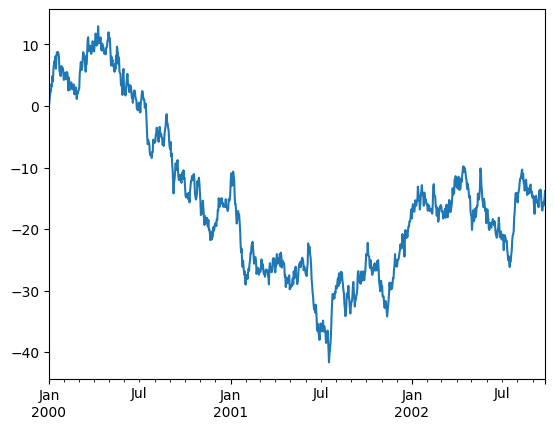

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()


<Figure size 640x480 with 0 Axes>

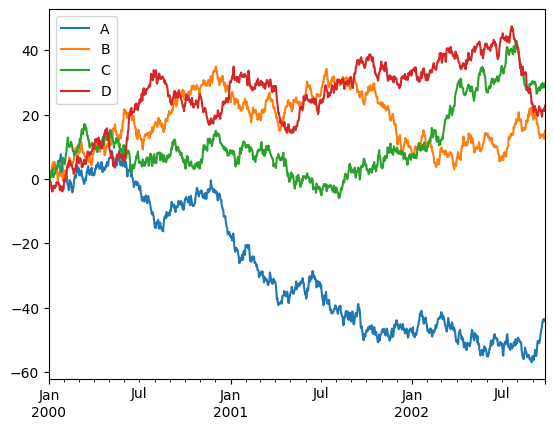

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()

plt.figure()

df.plot()

plt.legend(loc='best')


## Import & Export Data

[pandas.read_excel 详细说明](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas-read-excel)

csv

In [37]:
filePath = r"./Test/people.xlsx"

peopleDF = pd.read_excel(filePath, sheet_name="People", header=0, index_col=None, na_values=np.nan)
print(peopleDF)


     姓名 行业/专业             学校/公司
0   NaN   机器人        UIUC硕+TJU本
1   zyy   NaN               NaN
2  jmzy   NaN        UCSD硕+TJU本
3   NaN    金融         HKU硕+FDU本
4   yyr   NaN               NaN
5   NaN    交通         UCB硕+TJU本
6   qyc   NaN  UChicago硕+CityU本
7   yty   计算机               NaN


In [42]:
filePathWrite = r"./Test/people_new.xlsx"


peopleDF.to_excel(filePathWrite, index=False)
